In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("J:/Data science/data/NLP/spam.csv" , encoding = "ISO-8859-1")

In [30]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
df = df[['v1','v2']]

In [32]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df.shape

(5572, 2)

In [34]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [35]:
df.columns = ['label' , 'sentece']

In [36]:
df.head()

,label,sentece
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [38]:
df.shape

(5572, 2)

In [39]:
x = df['sentece']
y = df['label']

In [40]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: sentece, dtype: object

In [41]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [42]:
df['label'] = df['label'].map({'ham':0 , 'spam':1})

In [43]:
df.head()

,label,sentece
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
y = df['label']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.35 , random_state=101)

In [47]:
x_train.head()

4734                 Oh k:)after that placement there ah?
4676                 Wewa is 130. Iriver 255. All 128 mb.
3736    Plz note: if anyone calling from a mobile Co. ...
749            By monday next week. Give me the full gist
1181                           You flippin your shit yet?
Name: sentece, dtype: object

In [48]:
y_train.head()

4734    0
4676    0
3736    0
749     0
1181    0
Name: label, dtype: int64

In [49]:
y_train.value_counts() , y_test.value_counts()

(0    3125
 1     496
 Name: label, dtype: int64,
 0    1700
 1     251
 Name: label, dtype: int64)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf = TfidfVectorizer(stop_words='english')
x_train_tfidf_mat = tfidf.fit_transform(x_train)
x_test_tfidf_mat = tfidf.transform(x_test)

In [52]:
x_train_dfidf = pd.DataFrame.sparse.from_spmatrix(x_train_tfidf_mat)
x_train_dfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,6636,6637,6638,6639,6640,6641,6642,6643,6644,6645
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
tfidf.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [54]:
from sklearn.svm import LinearSVC

In [55]:
clf = LinearSVC()
clf.fit(x_train_tfidf_mat,y_train)

LinearSVC()

In [56]:
y_pred = clf.predict(x_test_tfidf_mat)

In [57]:
from sklearn.metrics import confusion_matrix , plot_confusion_matrix
conf = confusion_matrix(y_test,y_pred)
conf

array([[1696,    4],
       [  21,  230]], dtype=int64)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


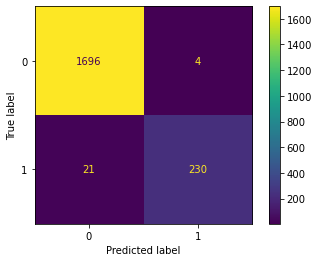

In [59]:
plot_con = plot_confusion_matrix(clf , x_test_tfidf_mat , y_test)

In [63]:
import matplotlib.pyplot as plt
import numpy as np